In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (16, 12)

In [2]:
# load dataset
cleaned_df= pd.read_csv('neiva_solocast_data_cleaned.csv')
cleaned_df.head()

,Unnamed: 0,MonthPE,Date,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_DHI,Daily_radiation
0,2019-12-31,12,2019-12-31,23.766667,46.750000,79.083333,918.991667,79.000000,1.408333,331.583333,210.500000,455.166667
1,2020-01-01,1,2020-01-01,24.941667,45.525000,73.583333,918.416667,74.666667,1.516667,410.833333,185.250000,484.666667
2,2020-01-02,1,2020-01-02,24.525000,41.516667,76.166667,918.983333,179.000000,1.008333,390.083333,219.750000,456.333333
3,2020-01-03,1,2020-01-03,25.183333,31.233333,69.666667,921.125000,191.333333,0.566667,546.666667,148.083333,513.000000
4,2020-01-04,1,2020-01-04,24.650000,28.000000,68.416667,921.825000,164.250000,0.791667,617.250000,117.916667,534.666667


In [3]:
cleaned_df.columns


Index(['Unnamed: 0', 'MonthPE', 'Date', 'Daily_Temp', 'Daily_Precip',
       'Daily_Humidity', 'Daily_Pressure', 'Daily_WindDir', 'Daily_WindSpeed',
       'Daily_DNI', 'Daily_DHI', 'Daily_radiation'],
      dtype='object')

In [4]:
# select features
cleaned_df= cleaned_df[['MonthPE', 'Date', 'Daily_Temp', 'Daily_Precip', 'Daily_Humidity', 'Daily_Pressure',\
                        'Daily_WindDir', 'Daily_WindSpeed', 'Daily_DNI', 'Daily_DHI', 'Daily_radiation']]

In [5]:
# Feature Engineering of Time Series Column
cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'], format='%Y-%m-%d')
cleaned_df['year'] = cleaned_df['Date'].dt.year
cleaned_df['month'] = cleaned_df['Date'].dt.month
cleaned_df['day'] = cleaned_df['Date'].dt.day

In [6]:
# select features
cleaned_df = cleaned_df[['month', 'day', 'Daily_Temp', 'Daily_Precip', 'Daily_Humidity',
       'Daily_Pressure', 'Daily_WindDir', 'Daily_WindSpeed', 'Daily_DNI',
       'Daily_DHI', 'Daily_radiation']]
cleaned_df.head()

,month,day,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_DHI,Daily_radiation
0,12,31,23.766667,46.750000,79.083333,918.991667,79.000000,1.408333,331.583333,210.500000,455.166667
1,1,1,24.941667,45.525000,73.583333,918.416667,74.666667,1.516667,410.833333,185.250000,484.666667
2,1,2,24.525000,41.516667,76.166667,918.983333,179.000000,1.008333,390.083333,219.750000,456.333333
3,1,3,25.183333,31.233333,69.666667,921.125000,191.333333,0.566667,546.666667,148.083333,513.000000
4,1,4,24.650000,28.000000,68.416667,921.825000,164.250000,0.791667,617.250000,117.916667,534.666667


In [7]:
X = cleaned_df.drop(['Daily_radiation'], axis=1)
y = cleaned_df['Daily_radiation']

## Training and testing

In [8]:
# import libraries for algorithms traininng, and metrics to judge performance
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Linear regression


In [10]:
# Setup the pipeline steps for linear regression
steps = [('scaler', StandardScaler()), ('lr', LinearRegression())]
# Create the pipeline
pipeline_lr = Pipeline(steps)
# Fit the pipeline to the train set
pipeline_lr.fit(X_train, y_train)
# Predict the labels of the test set
y_pred_lr = pipeline_lr.predict(X_test)

In [11]:
# Evaluating algorithm performance
mse = mean_squared_error(y_test, y_pred_lr, squared = False)

mae = mean_absolute_error(y_test, y_pred_lr)

print('r2_score: ', r2_score(y_test, y_pred_lr))

print('Root Mean Squared Error: %.2f' % np.sqrt(mse))

print('Root Mean Absolute Error: %.2f' % np.sqrt(mae))

r2_score:  0.9355561811508997
Root Mean Squared Error: 4.41
Root Mean Absolute Error: 3.90


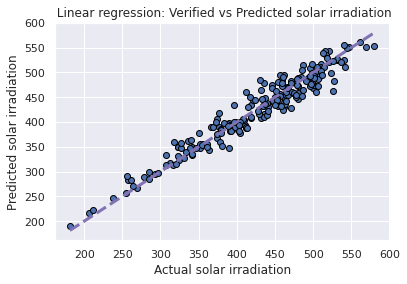

In [12]:
# Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_lr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Linear regression: Verified vs Predicted solar irradiation")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


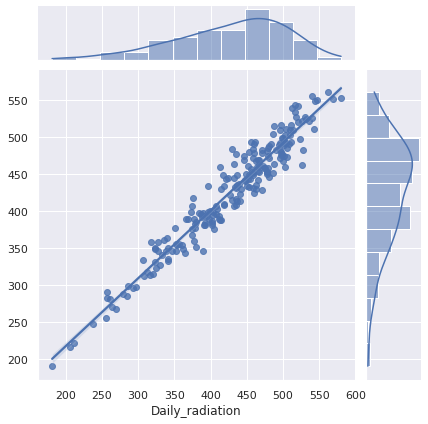

In [14]:
sns.jointplot(y_test, y_pred_lr, kind = 'reg')
plt.show()

## Random forest

In [15]:
# Setup the pipeline steps for random forest: steps
steps = [('scaler', StandardScaler()), ('rfr', RandomForestRegressor())]
# Create the pipeline: pipeline
pipeline_rfr = Pipeline(steps)
# Fit the pipeline to the train set
pipeline_rfr.fit(X_train, y_train)
# Predict the labels of the test set
y_pred_rfr = pipeline_rfr.predict(X_test)

In [16]:
# Evaluating algorithm performance
mse_rf = mean_squared_error(y_test, y_pred_rfr, squared = False)

mae_rf = mean_absolute_error(y_test, y_pred_rfr)

print('r2_score: ', r2_score(y_test, y_pred_rfr))

print('Root Mean Squared Error: %.2f' % np.sqrt(mse_rf))

print('Root Mean Absolute Error: %.2f' % np.sqrt(mae_rf))

r2_score:  0.9229979908029372
Root Mean Squared Error: 4.61
Root Mean Absolute Error: 4.07


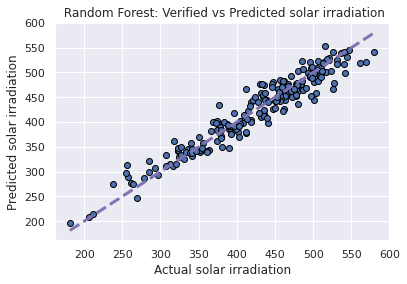

In [17]:
# Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_rfr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Random Forest: Verified vs Predicted solar irradiation")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


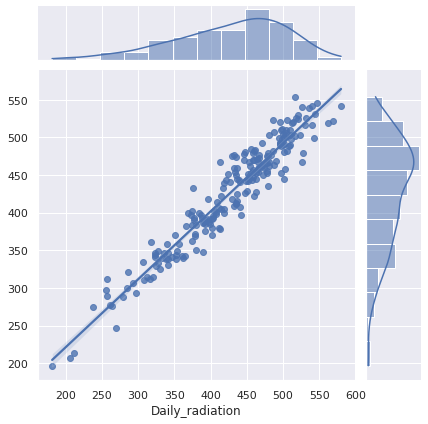

In [18]:
sns.jointplot(y_test, y_pred_rfr, kind = 'reg')
plt.show()

## Gradient Boosting

In [20]:
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()), ('gbr', GradientBoostingRegressor())]
# Create the pipeline: pipeline
pipeline_gbr = Pipeline(steps)
# Fit the pipeline to the train set
pipeline_gbr.fit(X_train, y_train)
# Predict the labels of the test set
y_pred_gbr = pipeline_gbr.predict(X_test)

In [21]:
# Evaluating algorithm performance
mse_gr = mean_squared_error(y_test, y_pred_gbr, squared = False)

mae_gr = mean_absolute_error(y_test, y_pred_gbr)

print('r2_score: ', r2_score(y_test, y_pred_gbr))

print('Root Mean Squared Error: %.2f' % np.sqrt(mse_gr))

print('Root Mean Absolute Error: %.2f' % np.sqrt(mae_gr))


r2_score:  0.9365550945770372
Root Mean Squared Error: 4.39
Root Mean Absolute Error: 3.93


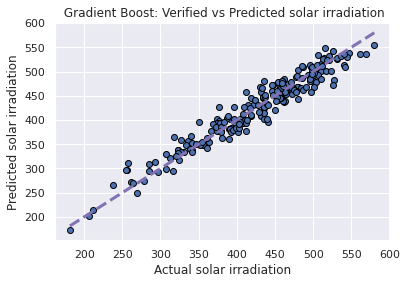

In [22]:
# Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_gbr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Gradient Boost: Verified vs Predicted solar irradiation")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


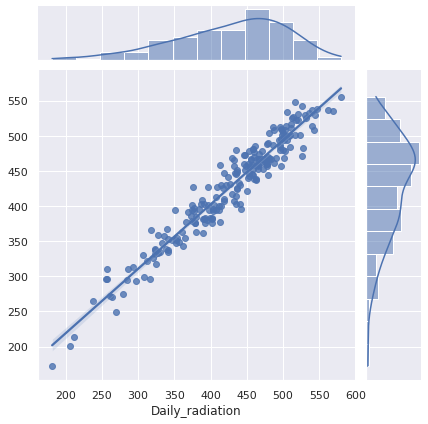

In [23]:
sns.jointplot(y_test, y_pred_gbr, kind = 'reg')
plt.show()